Epoch 1/10
125/125 [==============================] - 18s 27ms/step - loss: 2576.7170 - mae: 42.4891 - val_loss: 1954.4629 - val_mae: 36.2776
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 1654.0277 - mae: 33.1758 - val_loss: 1439.1090 - val_mae: 31.0492
Epoch 3/10
125/125 [==============================] - 1s 8ms/step - loss: 1282.5897 - mae: 29.4291 - val_loss: 1158.7527 - val_mae: 28.2221
Epoch 4/10
125/125 [==============================] - 1s 8ms/step - loss: 1065.7958 - mae: 27.2404 - val_loss: 993.0026 - val_mae: 26.5357
Epoch 5/10
125/125 [==============================] - 1s 7ms/step - loss: 941.4471 - mae: 25.9963 - val_loss: 900.3249 - val_mae: 25.5866
Epoch 6/10
125/125 [==============================] - 1s 6ms/step - loss: 874.6088 - mae: 25.3258 - val_loss: 851.1719 - val_mae: 25.0624
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 827.3851 - mae: 24.7136 - val_loss: 802.7226 - val_mae: 24.3343
Epoch 8/10
125/125 [=====

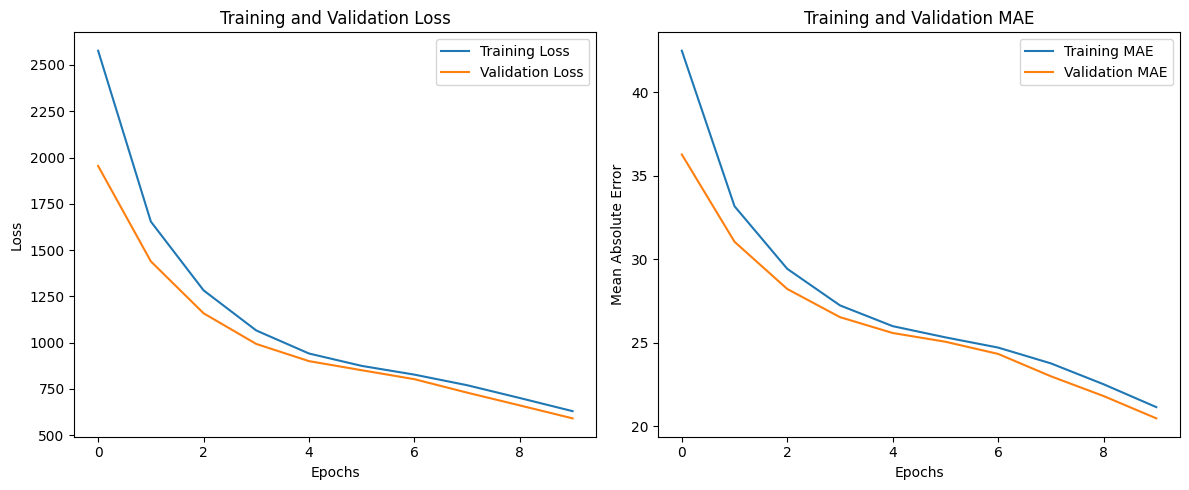

1/1 [==============================] - 1s 721ms/step
Input values: [24 24 82 60 78 62 29 93 63 13]
Predicted values: [54.46107]

Input values: [32 46 60 96 48 26 90 54 58 80]
Predicted values: [55.14046]

Input values: [28 56 33 86 88 39 25 45  7 61]
Predicted values: [50.00316]

Input values: [11 20 94 94 34 65 45 62 66 58]
Predicted values: [54.61649]

Input values: [18 89 91 16 89 97 71 95 70 45]
Predicted values: [55.25971]



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import matplotlib.pyplot as plt

# Generate synthetic dataset
def generate_data(num_samples, input_seq_length, max_value):
    X = np.random.randint(1, max_value, size=(num_samples, input_seq_length))
    y = np.array([list(reversed(x)) for x in X])
    return X, y

num_samples = 10000
input_seq_length = 10
max_value = 100

X, y = generate_data(num_samples, input_seq_length, max_value)

# Define the encoder-decoder model
input_seq = Input(shape=(input_seq_length, 1))  # Add timestep dimension
encoder = LSTM(64, return_state=True)
encoder_outputs, state_h, state_c = encoder(input_seq)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, 1))  # Add timestep dimension
decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(1)  # Output dimension changed to 1
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([input_seq, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit([X[:, :, np.newaxis], y[:, :-1, np.newaxis]], y[:, 1:, np.newaxis], epochs=10, batch_size=64, validation_split=0.2)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Choose 5 random indices from the dataset
random_indices = np.random.randint(0, len(X), size=5)

input_sequences = X[random_indices]
input_sequences = input_sequences[:, :, np.newaxis]

# Predict the output sequences
predicted_sequences = model.predict([input_sequences, np.zeros((5, 1, 1))])

for input_seq, predicted_seq in zip(input_sequences, predicted_sequences):
    print("Input values:", input_seq.flatten())
    print("Predicted values:", predicted_seq.flatten())
    print()